# Part I: Working with Time Series Data

*A Coca-Cola Company (Ticker Symbol: KO) - listed on the NYSE*

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [3]:
#B,C
KO = pd.read_csv("KO.csv",index_col='Date',parse_dates=True)
#(a)
KO.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-18,64.769997,65.180000,64.180000,64.440002,62.587334,11679400
2022-04-19,64.500000,65.250000,64.440002,65.070000,63.199219,11993800
2022-04-20,65.440002,66.239998,65.400002,65.959999,64.063629,14827100
2022-04-21,65.980003,67.000000,65.720001,66.209999,64.306450,15120400
2022-04-22,66.080002,66.339996,65.180000,65.250000,63.374043,14902200


In [4]:
#(b)
KO.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-04-18 to 2023-04-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


*D Yes,it is. This dataframe has a column of date which is usually used as the index of the dataframe, allowing you to easily slice and analyze the data based on time periods.*

In [5]:
#E
#(a)
print(KO.index.max())
print(KO.index.min())

2023-04-18 00:00:00
2022-04-18 00:00:00


In [6]:
#(b)
print(KO.index.argmax())
print(KO.index.argmin())

251
0


*(C) max() and min() return the maximum and minimum datetime values of the time series. The argmax() and argmin() methods return the index location of the maximum and minimum values of the index attribute,argmax() returns the index location ofargmin() returns the index location of the minimum datetime value.*

<AxesSubplot:xlabel='Date'>

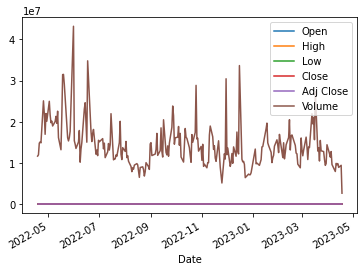

In [7]:
#F
#(a)
KO.plot()

*(i)This plot is hard to interpret because it includes many variabls and the scale of the these variables are not appropriate. Also it  contains a lot of noise or variability, it can be difficult to identify underlying trends or patterns.*

*To make a time series graph easier to understand, there are several steps you can take: 1.Choose an appropriate scale for the y-axis based on the range of values in the data. 2.Use smoothing techniques, such as moving averages, to reduce noise in the data and make underlying trends more visible.*

<AxesSubplot:xlabel='Date'>

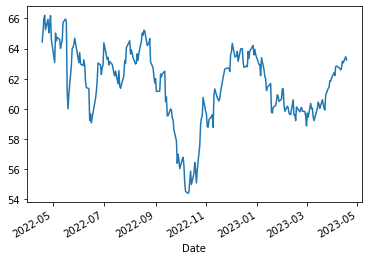

In [8]:
#(b)
KO['Close'].plot()

*(i)We can find that, the closing price experienced a huge drop and rise between September 2022 and January 2023. And it has experienced another small decline in March 2023. This plot is easier to interpret because it contains only one variable-- "Close", we can find the trend of closing price over time.*

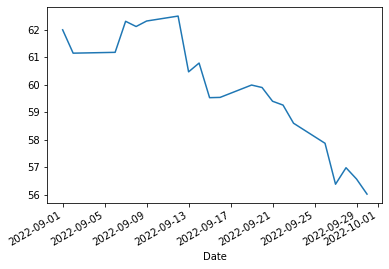

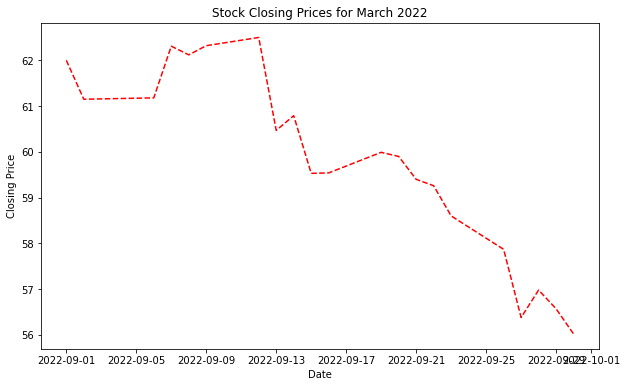

In [9]:
#(c)
start_date = '2022-09-01'
end_date = '2022-09-30'
one_month_data = KO.loc[start_date:end_date, 'Close']
one_month_data.plot()
plt.figure(figsize=(10,6))   # new figsize
plt.plot(one_month_data, color='red', linestyle='--')   # new line color and style

# Add axis labels and a title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Prices for March 2022')

# Display the plot
plt.show()

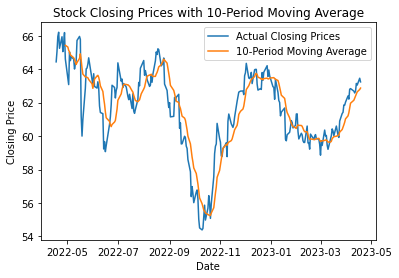

In [10]:
#G
#(a)
# Calculate the 10-period moving average of the 'Close' variable
ma10 = KO['Close'].rolling(window=10).mean()

# Plot the daily closing prices and the 10-period moving average
plt.plot(KO['Close'], label='Actual Closing Prices')
plt.plot(ma10, label='10-Period Moving Average')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Prices with 10-Period Moving Average')
plt.legend()


plt.show()


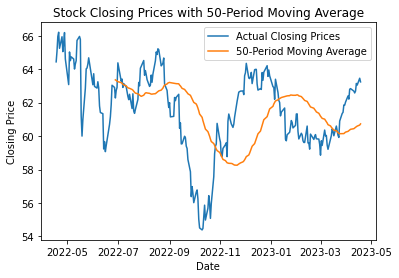

In [11]:
#(b)
# Calculate the 50-period moving average of the 'Close' variable
ma50 = KO['Close'].rolling(window=50).mean()

# Plot the daily closing prices and the 50-period moving average
plt.plot(KO['Close'], label='Actual Closing Prices')
plt.plot(ma50, label='50-Period Moving Average')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Prices with 50-Period Moving Average')
plt.legend()


plt.show()

*(c)When plotting two moving averages of different periods on the same chart, the shorter moving average will be more sensitive to short-term price movements, while the longer moving average will be more sensitive to long-term trends. This means that the shorter moving average will respond more quickly to changes in price, while the longer moving average will be slower to respond, but will provide a smoother trendline.*

*The advantage of using a shorter moving average window is that it can provide more timely signals for entering or exiting a position, as it will respond more quickly to changes in price. However, shorter moving averages can also be more prone to false signals, as they may react to short-term price fluctuations that are not indicative of a longer-term trend.*

*On the other hand, the advantage of using a longer moving average window is that it can filter out short-term price fluctuations and provide a more accurate representation of the longer-term trend. However, longer moving averages may be slower to react to changes in price, which can result in delayed signals for entering or exiting a position.*

<AxesSubplot:xlabel='Date'>

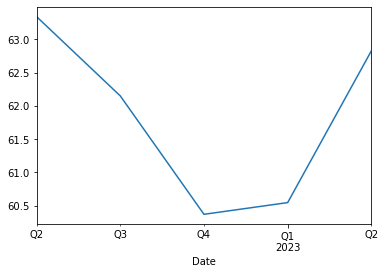

In [12]:
#H
#(a)(i)
KO_quarterly = KO.resample('Q').mean()
KO_quarterly['Close'].plot()

*(ii)Resampling a time series involves changing the frequency of the time series by aggregating or downsampling the data to a lower frequency (e.g., from daily to weekly or monthly) or upsampling the data to a higher frequency (e.g., from monthly to daily). This technique is useful for analyzing trends, patterns, and relationships in the data at different time intervals.*

*An example where resampling a time series can be useful is in weather forecasting. Weather data is often recorded at high frequencies, such as every minute or every hour. However, these high-frequency data can be noisy and difficult to analyze. By resampling the data to lower frequencies, such as daily or weekly, meteorologists can identify long-term weather patterns and trends, which can be used to forecast weather over longer time horizons. Additionally, resampling can help to identify seasonality and trends that may be missed at higher frequencies.*


# Part II: Marketing Mix Modeling with an Interaction Term

In [14]:
#I
#(a)
ads = pd.read_csv("schwab_ads.csv")
ads.head()

,Web,Bus_Stop,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [15]:
ads['Total_Spending'] = ads[['Web', 'Bus_Stop', 'Newspaper']].sum(axis=1)
ads.head()

,Web,Bus_Stop,Newspaper,Sales,Total_Spending
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


In [17]:
#(b)
corr = ads['Total_Spending'].corr(ads['Sales'])

# Print the correlation
print("The correlation between Total_Spending and Sales is:", corr)

The correlation between Total_Spending and Sales is: 0.924917006249931


*(i)Total_Spending and Sales are positively correlated*

*(ii)This means that as the total marketing spending increases, the sales also tend to increase. However, it's important to note that correlation does not necessarily imply causation.*

*We cannot conclude from this correlation alone that more ad spending leads to more sales because there may be other factors at play that affect sales, such as the quality of the product or competition. Additionally, the relationship between ad spending and sales may not be linear, and there may be diminishing returns to increasing ad spending beyond a certain point.*

In [19]:
#(c)
corr_matrix = ads.corr()
print(corr_matrix)

                     Web  Bus_Stop  Newspaper     Sales  Total_Spending
Web             1.000000  0.054809   0.056648  0.901208        0.945330
Bus_Stop        0.054809  1.000000   0.354104  0.349631        0.293211
Newspaper       0.056648  0.354104   1.000000  0.157960        0.343059
Sales           0.901208  0.349631   0.157960  1.000000        0.924917
Total_Spending  0.945330  0.293211   0.343059  0.924917        1.000000


*The correlation betweent Newspaper and Bus_Stop is high than the correlations between other variables. But the correlation between them is not very high, not necessarily a problem of multicollinearity, and can be used in the same linear model.*

In [22]:
#(d)

X = ads[['Web', 'Bus_Stop', 'Newspaper']]
y = ads['Sales']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           8.13e-99
Time:                        18:25:28   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
Web            0.0544      0.001     39.592      0.000       0.052       0.057
Bus_Stop       0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*(i)The p-value of the F-statistic for the model is 8.13e-99. This p-value tests the null hypothesis that all the regression coefficients are equal to zero. A low p-value (< 0.05) suggests that at least one of the predictors is significantly related to the outcome variable. A high p-value (> 0.05) suggests that the predictors are not jointly significant and the model may not be useful.*

*(ii)The p-value of web and bus_stop is 0, but for newspaper it is 0.954>0.05. A low p-value for a predictor (< 0.05) suggests that it is significantly related to the outcome variable, while a high p-value suggests that it is not significant.*

In [23]:
#(e)
ads['bus_web_interaction'] = ads['Bus_Stop'] * ads['Web']
X = ads[['Web', 'Bus_Stop', 'bus_web_interaction']]
y = ads['Sales']

X = sm.add_constant(X)

model_2 = sm.OLS(y, X).fit()

model_2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     694.7
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          3.90e-104
Time:                        18:48:44   Log-Likelihood:                -370.83
No. Observations:                 200   AIC:                             749.7
Df Residuals:                     196   BIC:                             762.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.1926      0.410     15.101      0.000       5.384       7.001
Web                     0.0436      0.002     17.512      0.000       0.039       0.048
Bus_Stop                0.0423      0.015      2.869      0.005       0.013       0.071
bus_web_interaction     0.0004   8.67e-05      5.110      0.000       0.000       0.001
==============================================================================
Omnibus:                        8.006   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               10.847
Skew:                          -0.258   Prob(JB):                      0.00441
Kurtosis:                       4.017   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*(i) The p-values for each of these predictors are all less than 0.05, suggest that they are all significantly related to the outcome variable.*

In [24]:
#(ii)
X = ads[['Web', 'Bus_Stop']]
y = ads['Sales']

X = sm.add_constant(X)

model_3 = sm.OLS(y, X).fit()

model_3.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          2.39e-100
Time:                        18:51:36   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.000       4.058       5.203
Web            0.0544      0.001     39.726      0.000       0.052       0.057
Bus_Stop       0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*The r-squared was 0.903 for the model that did not include interactions and 0.914 for the model that included interactions. The higher the r-squared, the better the performance of the model.*

In [25]:
#(iii)
web= 220
bus_stop = 30
interaction = web * bus_stop

X_pred = np.array([1, web, bus_stop, interaction])

y_pred = model_2.predict(X_pred)

print("Predicted Sales: ", y_pred[0])

Predicted Sales:  19.972593997237148


*(iv)The interaction effect between bus stop and web ad spending shows how the combined effect of both types of advertising on sales may differ from what we would expect based on their individual effects. In other words, the effect of bus stop ads on sales may depend on the level of web ad spending, and vice versa. This suggests that marketers should not just consider the effects of individual advertising channels, but also think about how they interact with each other in driving sales outcomes. For example, a marketer might find that increasing web ad spending has a greater effect on sales when bus stop ad spending is also high, compared to when bus stop ad spending is low.*

*(f) An example of an interaction term in a model could be the relationship between experience and education on job performance. Suppose a company wants to predict the job performance of their employees based on their level of experience and education. The interaction term would be the product of experience and education, as they may have a synergistic effect on job performance. If the effect of their interaction on job performance is positive, it would suggest that having a higher level of education and more experience could lead to higher job performance. On the other hand, if the effect of their interaction is negative, it would suggest that having a higher level of education and more experience may not necessarily lead to higher job performance. As a data scientist, I would feel that this interaction makes sense as both education and experience could contribute to job performance, but it may not be a straightforward additive effect. The interaction term allows us to capture the potential synergistic effect of having both attributes.*

# Part III: Wildcard: A Real-World Consulting Opportunity

*I think peer evaluation is a good way to reduce the workload of that lecturer and also to involve as many students as possible. To avoid some bias caused by interpersonal relationships, such as when you would give a higher grade to your best friend who is taking the same session as you.We can use the idea of a double-blind experiment to assign groups for peer evaluation. We should add another feedback session where your own assignments get a higher score if the graded person is satisfied with your evaluation, which is a nice incentive mechanism. Because then everyone would be responsible for their own evaluation.*